In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
"""
name: fjerez_mlabbe
channels:
	- conda-forge
	- defaults
dependencies:
	- python=3.9.0
	- pymc
	- arviz
	- python-graphviz
	- numpy
	- pandas
	- matplotlib
	- seaborn
	- scikit-learn
	- xgboost
	- pip	
	- torchinfo
	- torch
 """

'\nname: fjerez_mlabbe\nchannels:\n\t- conda-forge\n\t- defaults\ndependencies:\n\t- python=3.9.0\n\t- pymc\n\t- arviz\n\t- numpy\n\t- pandas\n\t- matplotlib\n\t- seaborn\n\t- scikit-learn\n\t- xgboost\n\t- pip\t\n '

In [3]:
PATH = 'New_DB.xlsx'
df = pd.read_excel(PATH)

In [4]:
df.head()

,Región,Comuna,Tipo Remoción en masa,Factor desencadenante,Fecha Evento,Longitud,Latitud,Sistema Georeferencia,Cota (m.s.n.m),slope,PP,valor_humedad_suelo1,valor_humedad_suelo2,valor_humedad_suelo3,valor_humedad_suelo4
0,Los Lagos,Castro,Flujo,Precipitaciones,07-03-2001,-73.7855,-42.4686,WGS 84- UTM 18 S,-,37.616885,11.358299,0.460907,0.417099,0.387939,0.410934
1,Los Lagos,Castro,Flujo,Precipitaciones,09-03-2001,-73.7855,-42.4686,WGS 84- UTM 18 S,-,37.616885,282.989359,0.467758,0.467758,0.466522,0.425278
2,Los Lagos,Chaitén,Deslizamiento,Precipitaciones,03-05-2002,-72.6983,-42.4087,WGS 84- UTM 18 S,-,58.718334,83.771901,0.436966,0.437408,0.438400,0.438980
3,Los Lagos,Río Negro,Deslizamiento,Precipitaciones,09-08-2002,-73.7889,-40.7083,WGS 84- UTM 18 S,6,40.098548,101.366892,0.515045,0.513718,0.519211,0.517426
4,Los Lagos,Osorno,Deslizamiento,Precipitaciones,22-08-2007,-73.6047,-40.5750,WGS 84- UTM 18 S,126,42.977906,0.000000,0.478531,0.480499,0.477859,0.500580


In [5]:
df.isnull().sum()

Región                     0
Comuna                     0
Tipo Remoción en masa      0
Factor desencadenante      0
Fecha Evento               0
Longitud                   0
Latitud                    0
Sistema Georeferencia      0
Cota (m.s.n.m)            20
slope                      1
PP                         0
valor_humedad_suelo1     138
valor_humedad_suelo2     138
valor_humedad_suelo3     138
valor_humedad_suelo4     138
dtype: int64

In [6]:
columns = ['slope', 'PP', 'valor_humedad_suelo1',
           'valor_humedad_suelo2', 'valor_humedad_suelo3', 'valor_humedad_suelo4']
X = df.loc[:, columns]

In [7]:
valor_humedad_suelo = ['valor_humedad_suelo1', 'valor_humedad_suelo2', 'valor_humedad_suelo3',
                       'valor_humedad_suelo4']
humedad_mean = X[valor_humedad_suelo].mean()    
X[valor_humedad_suelo] = X[valor_humedad_suelo].fillna(value=humedad_mean)
X.dropna(inplace=True)

In [8]:
print(f'Valores nulos: {X.isnull().sum().sum()}\nDimensión del nuevo dataset: {X.shape}\nDimensión de dataset original: {df.shape}\n Columnas: {X.columns}')

Valores nulos: 0
Dimensión del nuevo dataset: (416, 6)
Dimensión de dataset original: (417, 15)
 Columnas: Index(['slope', 'PP', 'valor_humedad_suelo1', 'valor_humedad_suelo2',
       'valor_humedad_suelo3', 'valor_humedad_suelo4'],
      dtype='object')


In [9]:
#Colores Gráficos
rc = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)
palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']
color = sns.color_palette("pink")

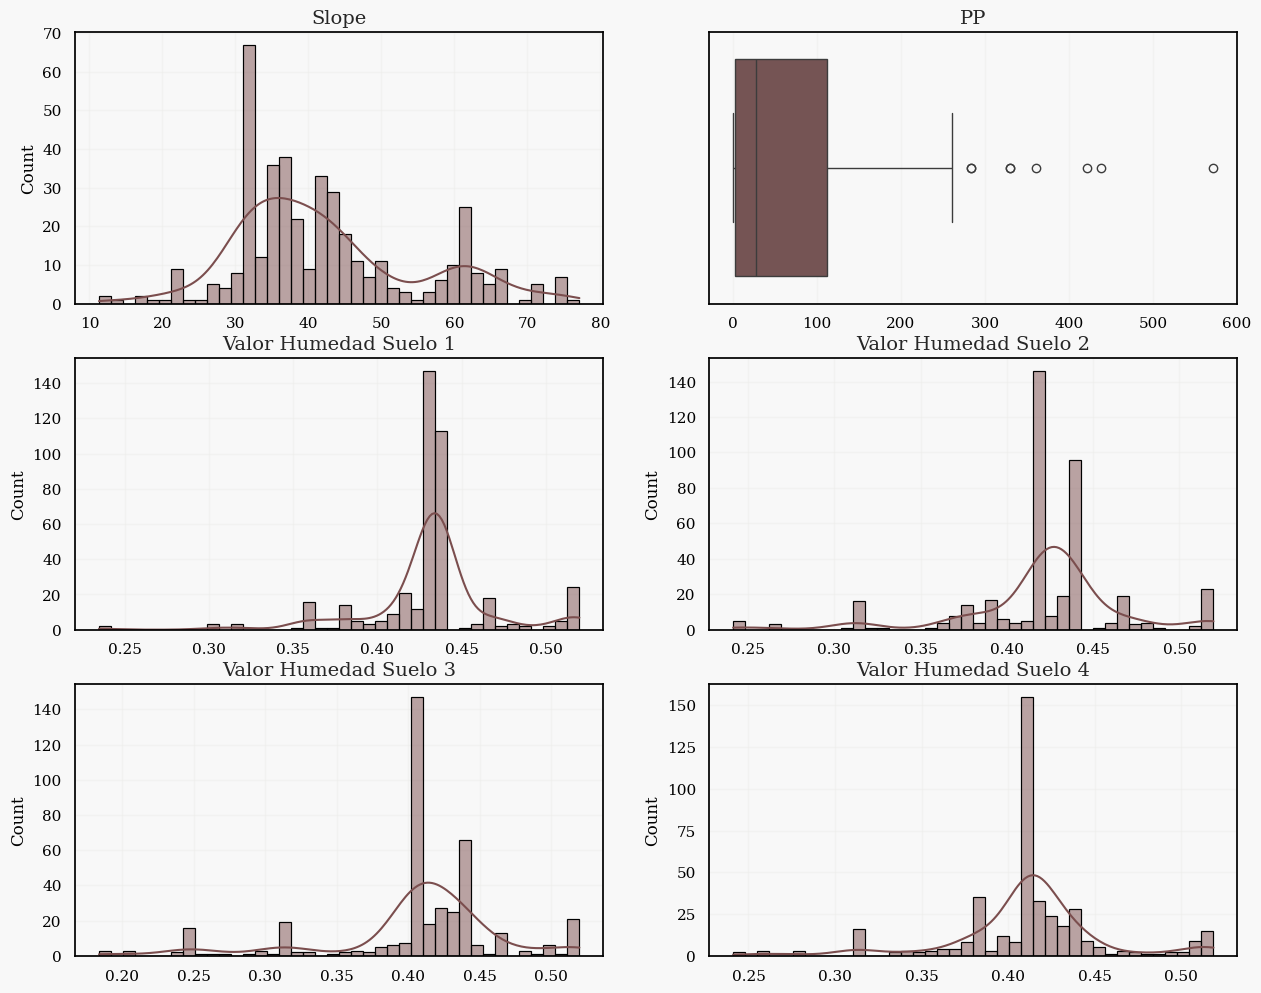

In [10]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,12))

sns.histplot(X.slope, ax=ax[0,0], kde=True, edgecolor='black', color=color[0], bins = 40)
ax[0,0].set_title('Slope', fontsize=14)
ax[0,0].set_xlabel('')

sns.boxplot(X.PP, ax=ax[0,1], color=color[0], orient='h')
ax[0,1].set_title('PP', fontsize=14)
ax[0,1].set_xlabel('')

sns.histplot(X.valor_humedad_suelo1, ax=ax[1,0], kde=True, edgecolor='black', color=color[0], bins = 40)
ax[1,0].set_title('Valor Humedad Suelo 1', fontsize=14)
ax[1,0].set_xlabel('')

sns.histplot(X.valor_humedad_suelo2, ax=ax[1,1], kde=True, edgecolor='black', color=color[0], bins = 40)
ax[1,1].set_title('Valor Humedad Suelo 2', fontsize=14)
ax[1,1].set_xlabel('')

sns.histplot(X.valor_humedad_suelo3, ax=ax[2,0], kde=True, edgecolor='black', color=color[0], bins = 40)
ax[2,0].set_title('Valor Humedad Suelo 3', fontsize=14)
ax[2,0].set_xlabel('')

sns.histplot(X.valor_humedad_suelo4, ax=ax[2,1], kde=True, edgecolor='black', color=color[0], bins = 40)
ax[2,1].set_title('Valor Humedad Suelo 4', fontsize=14)
ax[2,1].set_xlabel('')

plt.show()

In [11]:
X.describe()

,slope,PP,valor_humedad_suelo1,valor_humedad_suelo2,valor_humedad_suelo3,valor_humedad_suelo4
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,42.341600,65.934180,0.432158,0.421610,0.406082,0.412190
std,12.511018,81.915905,0.038082,0.046257,0.061454,0.044080
min,11.310793,0.000000,0.234695,0.241333,0.183578,0.241119
25%,33.310814,1.826394,0.432158,0.421610,0.406082,0.404613
50%,38.853602,27.659902,0.432158,0.421610,0.406082,0.412190
75%,48.413690,111.389278,0.438995,0.438919,0.438400,0.426201
max,77.123479,572.187521,0.520004,0.519699,0.519791,0.518738


In [12]:
X = X.drop(X.PP.idxmax())
X = X.reset_index(drop=True)

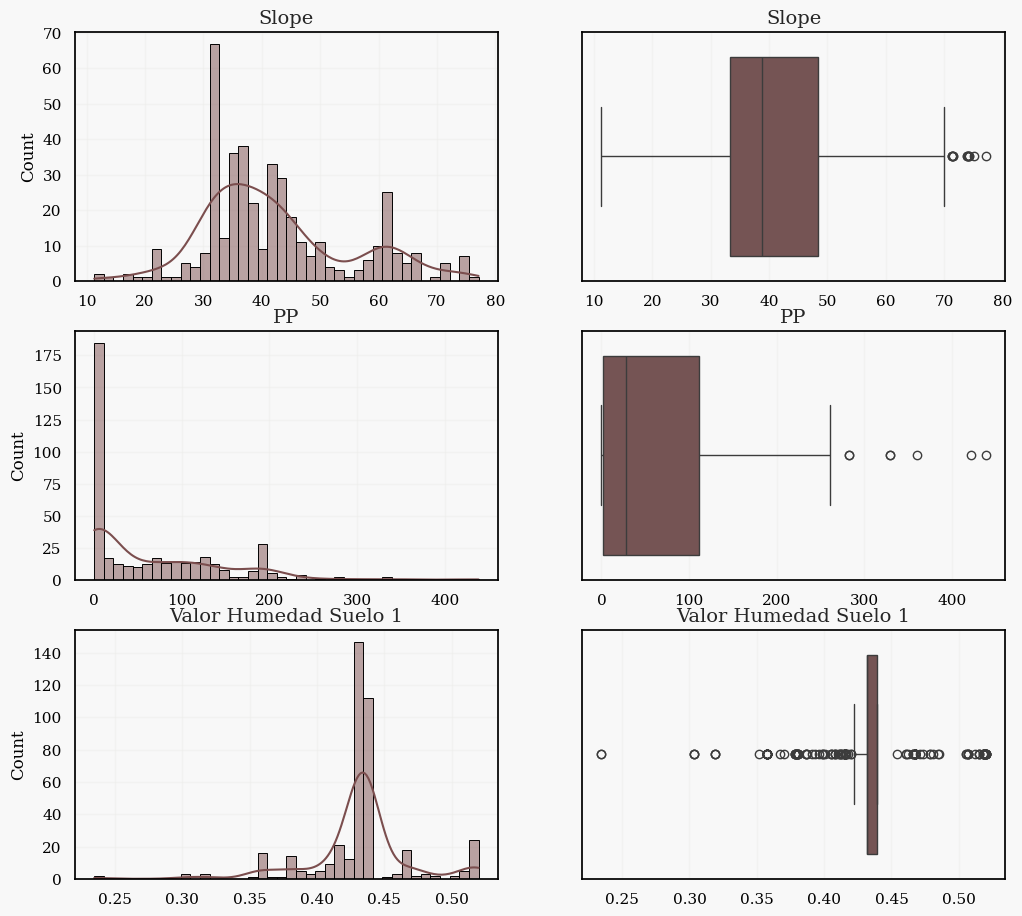

In [13]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12,11))

sns.histplot(X.slope, ax=ax[0,0], kde=True, edgecolor='black', color=color[0], bins = 40)
ax[0,0].set_title('Slope', fontsize=14)
ax[0,0].set_xlabel('')
sns.boxplot(X.slope, ax=ax[0,1], color=color[0], orient='h')
ax[0,1].set_title('Slope', fontsize=14)
ax[0,1].set_xlabel('')

sns.histplot(X.PP, ax=ax[1,0], kde=True, edgecolor='black', color=color[0], bins = 40)
ax[1,0].set_title('PP', fontsize=14)
ax[1,0].set_xlabel('')
sns.boxplot(X.PP, ax=ax[1,1], color=color[0], orient='h')
ax[1,1].set_title('PP', fontsize=14)
ax[1,1].set_xlabel('')

sns.histplot(X.valor_humedad_suelo1, ax=ax[2,0], kde=True, edgecolor='black', color=color[0], bins = 40)
ax[2,0].set_title('Valor Humedad Suelo 1', fontsize=14)
ax[2,0].set_xlabel('')
sns.boxplot(X.valor_humedad_suelo1, ax=ax[2,1], color=color[0], orient='h')
ax[2,1].set_title('Valor Humedad Suelo 1', fontsize=14)
ax[2,1].set_xlabel('')

plt.show()

In [14]:
class_drops = ['valor_humedad_suelo2', 'valor_humedad_suelo3', 'valor_humedad_suelo4']
X = X.drop(labels=class_drops, axis=1)

In [15]:
X.describe()

,slope,PP,valor_humedad_suelo1
count,415.000000,415.000000,415.000000
mean,42.282196,64.714292,0.432142
std,12.467241,78.140055,0.038126
min,11.310793,0.000000,0.234695
25%,33.286370,1.811167,0.432158
50%,38.804579,27.542932,0.432158
75%,48.413690,111.369088,0.438995
max,77.123479,438.595865,0.520004


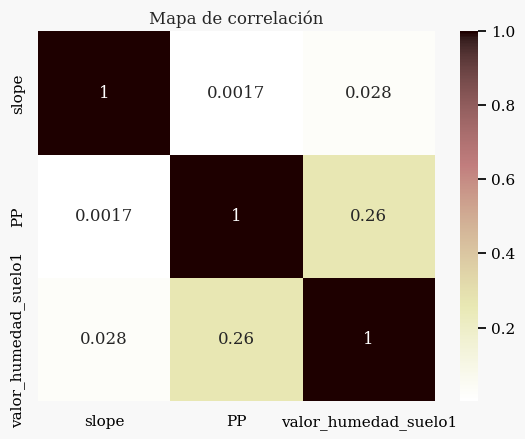

In [16]:
heatmap = sns.heatmap(np.abs(X.corr()),annot=True, cmap='pink_r')
heatmap.set_title('Mapa de correlación')
plt.show()

In [17]:
X['output'] = 1
df_slope_PP = X.drop(labels='valor_humedad_suelo1', axis=1)
df_general = X

In [18]:
n_df = df_general.drop(labels='output', axis=1) * 0.9
n_df['output'] = 0

In [19]:
n_df_slope_PP = n_df.drop(labels='valor_humedad_suelo1', axis=1)
n_df_general = n_df

In [20]:
X_slope_PP = pd.concat([df_slope_PP, n_df_slope_PP])
y_slope_PP = X_slope_PP.output
X_slope_PP = X_slope_PP.drop(labels='output', axis=1)

X_general = pd.concat([df_general, n_df_general])
y_general = X_general.output
X_general = X_general.drop(labels='output', axis=1)

In [21]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_general, y_general, train_size=0.7, stratify=y_general, random_state=12)

In [79]:
import pytensor
import pytensor.tensor as pt 
from sklearn.preprocessing import scale

floatX = pytensor.config.floatX

X_general = scale(X_general)
X_general = X_general.astype(floatX)
y_general = y_general.astype(floatX)
X_train, X_test, y_train, y_test = train_test_split(X_general, y_general, train_size=0.7, stratify=y_general, random_state=12)

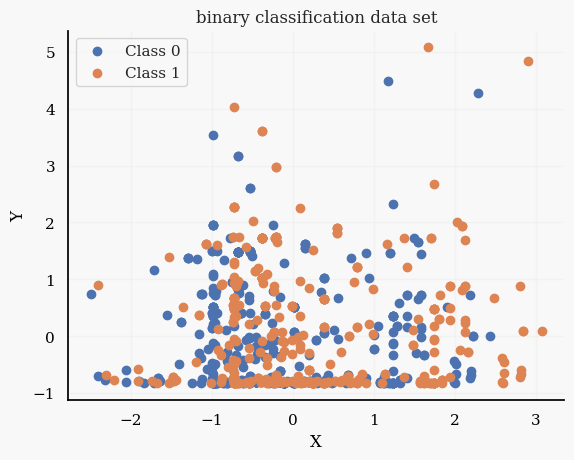

In [80]:
fig, ax = plt.subplots()
ax.scatter(X_general[y_general == 0, 0], X_general[y_general == 0, 1], color="C0", label="Class 0")
ax.scatter(X_general[y_general == 1, 0], X_general[y_general == 1, 1], color="C1", label="Class 1")
sns.despine()
ax.legend()
ax.set(xlabel="X", ylabel="Y", title="binary classification data set");

In [24]:
random_seed = 12
rng = np.random.default_rng(random_seed)

In [25]:
def construct_nn(ann_input, ann_output):
    n_hidden = 5

    # Initialize random weights between each layer
    init_1 = rng.standard_normal(size=(X_train.shape[1], n_hidden)).astype(floatX)
    init_2 = rng.standard_normal(size=(n_hidden, n_hidden)).astype(floatX)
    init_out = rng.standard_normal(size=n_hidden).astype(floatX)

    coords = {
        "hidden_layer_1": np.arange(n_hidden),
        "hidden_layer_2": np.arange(n_hidden),
        "train_cols": np.arange(X_train.shape[1]),
        # "obs_id": np.arange(X_train.shape[0]),
    }
    with pm.Model(coords=coords) as neural_network:
        ann_input = pm.Data("ann_input", X_train, mutable=True, dims=("obs_id", "train_cols"))
        ann_output = pm.Data("ann_output", y_train, mutable=True, dims="obs_id")

        # Weights from input to hidden layer
        weights_in_1 = pm.Normal(
            "w_in_1", 0, sigma=1, initval=init_1, dims=("train_cols", "hidden_layer_1")
        )

        # Weights from 1st to 2nd layer
        weights_1_2 = pm.Normal(
            "w_1_2", 0, sigma=1, initval=init_2, dims=("hidden_layer_1", "hidden_layer_2")
        )

        # Weights from hidden layer to output
        weights_2_out = pm.Normal("w_2_out", 0, sigma=1, initval=init_out, dims="hidden_layer_2")

        # Build neural-network using tanh activation function
        act_1 = pm.math.tanh(pm.math.dot(ann_input, weights_in_1))
        act_2 = pm.math.tanh(pm.math.dot(act_1, weights_1_2))
        act_out = pm.math.sigmoid(pm.math.dot(act_2, weights_2_out))

        # Binary classification -> Bernoulli likelihood
        out = pm.Bernoulli(
            "out",
            act_out,
            observed=ann_output,
            total_size=y_train.shape[0],  # IMPORTANT for minibatches
            dims="obs_id",
        )
    return neural_network


neural_network = construct_nn(X_train, y_train)

In [30]:
n_hidden = 5
ann_input = X_train 
ann_output = y_train
    # Initialize random weights between each layer
init_1 = rng.standard_normal(size=(X_train.shape[1], n_hidden)).astype(floatX)
init_2 = rng.standard_normal(size=(n_hidden, n_hidden)).astype(floatX)
init_out = rng.standard_normal(size=n_hidden).astype(floatX)

coords = {
        "hidden_layer_1": np.arange(n_hidden),
        "hidden_layer_2": np.arange(n_hidden),
        "train_cols": np.arange(X_train.shape[1]),
        # "obs_id": np.arange(X_train.shape[0]),
}
with pm.Model(coords=coords) as neural_network:
        ann_input = pm.Data("ann_input", X_train, mutable=True, dims=("obs_id", "train_cols"))
        ann_output = pm.Data("ann_output", y_train, mutable=True, dims="obs_id")

        # Weights from input to hidden layer
        weights_in_1 = pm.Normal(
            "w_in_1", 0, sigma=1, initval=init_1, dims=("train_cols", "hidden_layer_1")
        )

        # Weights from 1st to 2nd layer
        weights_1_2 = pm.Normal(
            "w_1_2", 0, sigma=1, initval=init_2, dims=("hidden_layer_1", "hidden_layer_2")
        )

        # Weights from hidden layer to output
        weights_2_out = pm.Normal("w_2_out", 0, sigma=1, initval=init_out, dims="hidden_layer_2")

        # Build neural-network using tanh activation function
        act_1 = pm.math.tanh(pm.math.dot(ann_input, weights_in_1))
        act_2 = pm.math.tanh(pm.math.dot(act_1, weights_1_2))
        act_out = pm.math.sigmoid(pm.math.dot(act_2, weights_2_out))

        # Binary classification -> Bernoulli likelihood
        out = pm.Bernoulli(
            "out",
            act_out,
            observed=ann_output,
            total_size=y_train.shape[0],  # IMPORTANT for minibatches
            dims="obs_id",
        )

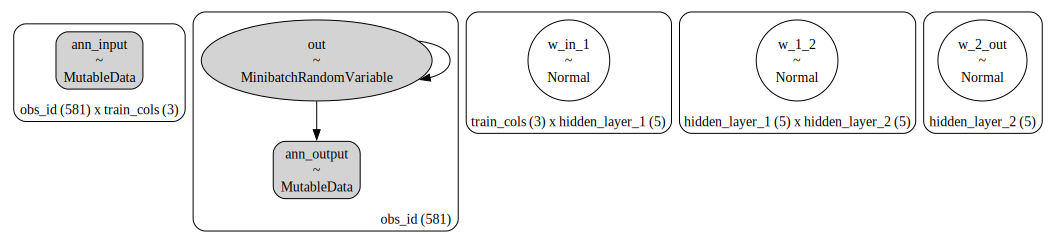

In [32]:
pm.model_to_graphviz(neural_network)

In [ ]:
columns

['slope',
 'PP',
 'valor_humedad_suelo1',
 'valor_humedad_suelo2',
 'valor_humedad_suelo3',
 'valor_humedad_suelo4']

In [ ]:
X_general

,slope,PP,valor_humedad_suelo1
0,37.616885,11.358299,0.460907
1,37.616885,282.989359,0.467758
2,58.718334,83.771901,0.436966
3,40.098548,101.366892,0.515045
4,42.977906,0.000000,0.478531
...,...,...,...
410,34.089496,166.726218,0.388942
411,28.259235,78.194891,0.388942
412,20.060971,2.874557,0.467194
413,41.127173,23.174782,0.388942


In [ ]:
"""lower = -10**6
higher = 10**6

with pm.Model() as model:
    beta_0 = pm.Uniform('beta_0', lower = lower, upper = higher)
    beta_slope = pm.Uniform('beta_slope', lower = lower, upper= higher)
    beta_PP = pm.Uniform('beta_PP', lower, higher)
    beta_valor_humedad_suelo1 = pm.Uniform('beta_valor_humedad_suelo1', lower, higher)
    p = pm.Deterministic('p', pm.math.sigmoid(beta_0 + beta_slope*X_general.slope + beta_PP*X_general.PP + beta_valor_humedad_suelo1*X_general.valor_humedad_suelo1))
    
with model:
    observed = pm.Bernoulli('output', p, observed=y_general)
    start = pm.find_MAP()
    step = pm.Metropolis()
    
    trace = pm.sample(25000, step= step, start = start)
    burned_trace = trace[15000:]"""
    

c:\Users\ivo\.conda\envs\fjerez_mlabbe\lib\site-packages\pytensor\scalar\basic.py:2004: RuntimeWarning: invalid value encountered in divide
  return x / y


C:\Users\ivo\AppData\Local\Temp\ipykernel_18168\1666086677.py:16: FutureWarning: The `start` kwarg was renamed to `initvals` and can now do more. Please check the docstring.
  trace = pm.sample(25000, step= step, start = start)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [beta_0]
>Metropolis: [beta_slope]
>Metropolis: [beta_PP]
>Metropolis: [beta_valor_humedad_suelo1]


Sampling 4 chains for 1_000 tune and 25_000 draw iterations (4_000 + 100_000 draws total) took 7090 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


KeyError: slice(15000, None, None)

In [ ]:
import pickle

with open('modelo_pymc.pickle', 'wb') as f:
    pickle.dump(model, f)

with open('trace_pymc.pickle', 'wb') as f:
    pickle.dump(burned_trace, f)
    
    

In [ ]:
%%time

with neural_network:
    approx = pm.fit(n=10_000)

Finished [100%]: Average Loss = 259.02


CPU times: total: 10min 41s
Wall time: 10min 40s


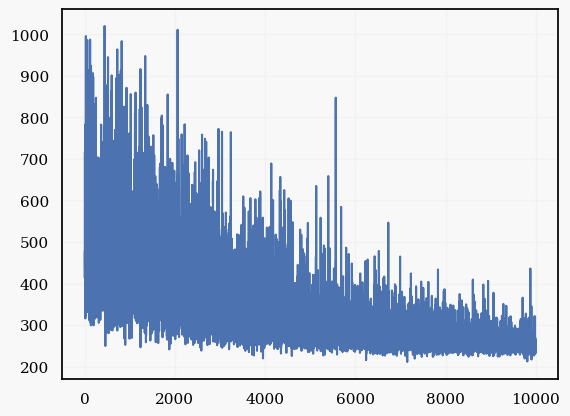

In [ ]:
plt.plot(approx.hist)

In [ ]:
trace = approx.sample(draws=5000)

In [ ]:
with neural_network:
    pm.set_data(new_data={"ann_input": X_test})
    ppc = pm.sample_posterior_predictive(trace)
    trace.extend(ppc)

Sampling: [out]


In [ ]:
pred = ppc.posterior_predictive["out"].mean(("chain", "draw")) > 0.50

[Text(0.5, 1.0, 'Predicted labels in testing set'),
 Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y')]

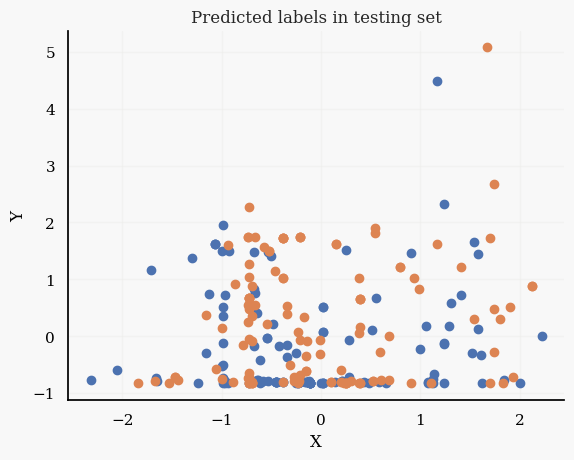

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_test[pred == 0, 0], X_test[pred == 0, 1], color="C0")
ax.scatter(X_test[pred == 1, 0], X_test[pred == 1, 1], color="C1")
sns.despine()
ax.set(title="Predicted labels in testing set", xlabel="X", ylabel="Y")

In [ ]:
print(f"Accuracy = {(y_test == pred.values).mean() * 100}%")

Accuracy = 83.93574297188755%


In [ ]:
from sklearn.metrics import RocCurveDisplay, auc, roc_curve

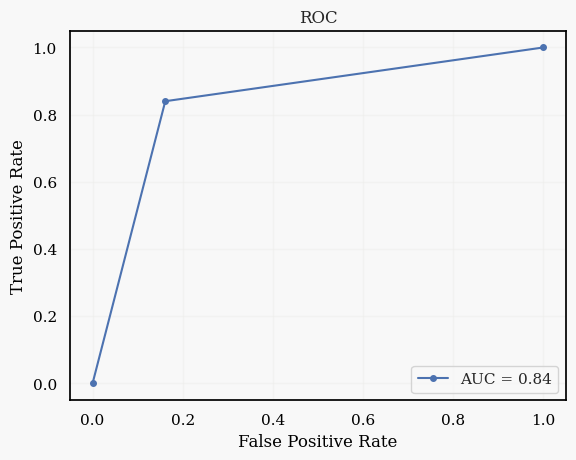

In [ ]:
fpr, tpr, thresholds = roc_curve(
    y_true=y_test, y_score=pred, pos_label=1, drop_intermediate=False
)
roc_auc = auc(fpr, tpr)
fig, ax = plt.subplots()
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display = roc_display.plot(ax=ax, marker="o", markersize=4)

ax.set(title="ROC");

In [75]:
from pymc import HalfCauchy, Model, Normal, sample
import xarray as xr